Se importan las librerías

In [330]:
import numpy as np
import matplotlib.pyplot as plt

Se definen la función, sus derivadas y la función para calcular el descenso del gradiente.

In [333]:
# Definir la función objetivo
def objective(x, y):
    return 10 - np.exp(-(x**2 + 3 * y**2))

# Derivada parcial en X de la función objetivo
def partial_derivative_x(x, y):
    return 2 * x * np.exp(-x**2 - 3 * y**2)

# Derivada parcial en Y de la función objetivo
def partial_derivative_y(x, y):
    return 6 * y * np.exp(-x**2 - 3 * y**2)

# Algoritmo de descenso del gradiente
def gradient_descent(objective, partial_derivative_x, partial_derivative_y, LIMITS, n_iters, step_size):
    # Inicializar listas para rastrear soluciones y puntajes
    solutions_x, solutions_y, scores = [], [], []
    # Generar un punto inicial aleatorio dentro de los límites
    x, y = LIMITS[:, 0] + np.random.rand(2) * (LIMITS[:, 1] - LIMITS[:, 0])

    # Ejecutar el descenso de gradiente
    for i in range(n_iters):
        # Calcular las derivadas parciales
        gradient_x = partial_derivative_x(x, y)
        gradient_y = partial_derivative_y(x, y)

        # Tomar un paso en la dirección opuesta al gradiente
        x -= step_size * gradient_x
        y -= step_size * gradient_y

        # Evaluar el punto candidato en la función objetivo
        score = objective(x, y)

        # Almacenar la solución y el puntaje
        solutions_x.append(x)
        solutions_y.append(y)
        scores.append(score)

        # Informar sobre el progreso
        # print('Iteración %d: f(%s, %s) = %.5f' % (i, x, y, score))

    return solutions_x, solutions_y, scores

Se realiza la búsqueda del decenso del gradiente y crea la malla con los valores para la superficie de la gráfica de la función.

In [345]:
# Definir los límites para las variables x e y
LIMITS = np.array([[-1.0, 1.0], [-1.0, 1.0]])

# Definir el número de iteraciones y el tamaño del paso
n_iters = 30
step_size = 0.1

# Realizar la búsqueda del descenso de gradiente
solutions_x, solutions_y, scores = gradient_descent(objective, partial_derivative_x, partial_derivative_y, LIMITS, n_iters, step_size)

# Crear una malla para la superficie de la función
x_range = np.linspace(LIMITS[0, 0], LIMITS[0, 1], 100)
y_range = np.linspace(LIMITS[1, 0], LIMITS[1, 1], 100)
X, Y = np.meshgrid(x_range, y_range)
Z = objective(X, Y)

Se visualiza la superficie la función así como las soluciones obtenidas mediante la función del descenso del gradiente.

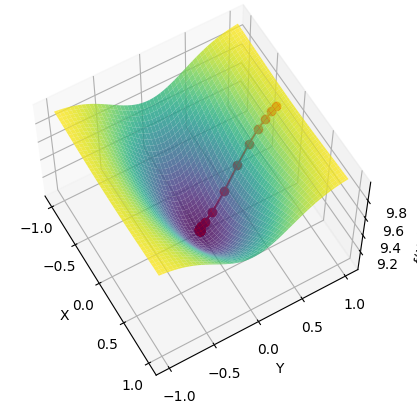

In [346]:
# Crear una figura para visualizar el proceso
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie de la función
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Dibujar las soluciones encontradas por el descenso de gradiente
ax.plot(solutions_x, solutions_y, scores, marker='o', linestyle='-', color='red')

# Configurar etiquetas
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')

# Cambiar inclinación
ax.view_init(elev=60, azim=-30)

# Mostrar figura
plt.show()